In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
import pandas as pd

diabetes = load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [3]:
df_diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_diabetes['target'] = diabetes.target

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_diabetes[::-1], df_diabetes['target'], test_size=0.3, random_state=0)

In [7]:
from sklearn.model_selection import GridSearchCV
clf = SGDRegressor(random_state=0)
model = GridSearchCV(estimator=clf, 
                     param_grid={
                         'shuffle':[True, False],#Whether or not the training data should be shuffled after each epoch.
                         'learning_rate':['constant', 'optimal', 'invscaling'],
                         'eta0':[0.1, 0.01, 0.001, 0.0001]
                     }, 
                     cv=10, 
                     n_jobs=2, 
                     scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)
print()
print(model.best_params_)
print(-model.best_score_)


{'eta0': 0.0001, 'learning_rate': 'invscaling', 'shuffle': False}
78.71692943977628


In [8]:
import numpy as np
predictions = model.predict(X_valid)
print(-model.score(X_valid, y_valid))

77.78778155921168


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print('Mean square error: %.2f'
      % mean_squared_error(y_valid, predictions))

# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, predictions))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, predictions))

Mean square error: 9962.08
Mean absolute error: 77.79
Coefficient of determination: -0.95


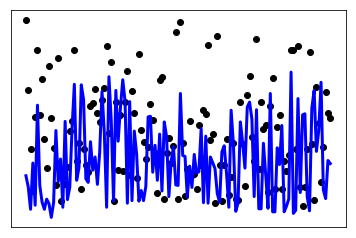

In [10]:
%matplotlib inline
# Plot outputs
plt.scatter(range(133), y_valid,  color='black')
plt.plot(range(133), predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()